<a href="https://colab.research.google.com/github/Bagito999/Deep-Learning/blob/main/ReviewTokoBaju_RNN_LSTM_GRU_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Model Deep Learning RNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [2]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Deep Learning/ReviewTokoBaju.csv")
df = df[['Review Text', 'Recommended IND']].dropna()

# Text preprocessing
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(df['Review Text']).toarray()
X = pad_sequences(X, maxlen=300, padding='post')  # Ensure equal length

y = df['Recommended IND'].values

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=300))
model.add(SimpleRNN(units=128, return_sequences=False))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test),
                    verbose=1)

Epoch 1/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 15s 43ms/step - accuracy: 0.7978 - loss: 0.5009 - val_accuracy: 0.8207 - val_loss: 0.5425
Epoch 2/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - accuracy: 0.8178 - loss: 0.4945 - val_accuracy: 0.8207 - val_loss: 0.4704
Epoch 3/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.8119 - loss: 0.4887 - val_accuracy: 0.8207 - val_loss: 0.4732
Epoch 4/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.8166 - loss: 0.4823 - val_accuracy: 0.8207 - val_loss: 0.4705
Epoch 5/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.8155 - loss: 0.4849 - val_accuracy: 0.8207 - val_loss: 0.4711
Epoch 6/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.8190 - loss: 0.4796 - val_accuracy: 0.8207 - val_loss: 0.4727
Epoch 7/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.8189 - loss: 0.4778 - val_accuracy: 0.8207 - val_loss: 0.4706
Epoch 8/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.8181 - loss: 0.4799 - val_a

In [5]:
# Evaluate
y_probs = model.predict(x_test).ravel()
y_preds = (y_probs >= 0.5).astype(int)

acc = accuracy_score(y_test, y_preds)
precision = precision_score(y_test, y_preds)
recall = recall_score(y_test, y_preds)
f1_sq = f1_score(y_test, y_preds)**2
auc = roc_auc_score(y_test, y_probs)

train_acc = history.history['accuracy'][-1]

print(f"Final Training Accuracy: {train_acc:.4f}")
print(f"Final Testing Accuracy: {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Squared: {f1_sq:.4f}")
print(f"AUC: {auc:.4f}")

142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
Final Training Accuracy: 0.8184
Final Testing Accuracy: 0.8207
Precision: 0.8207
Recall: 1.0000
F1 Squared: 0.8128
AUC: 0.5024


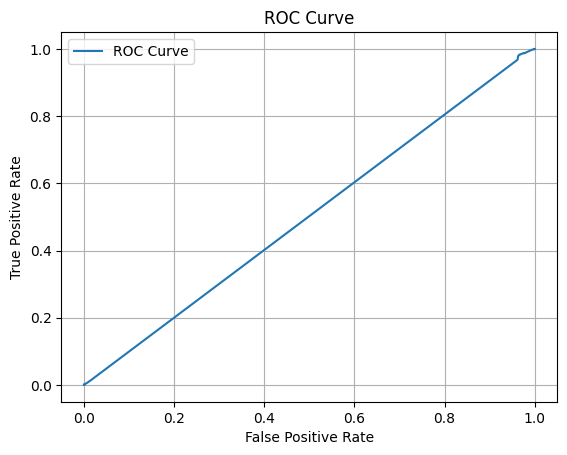

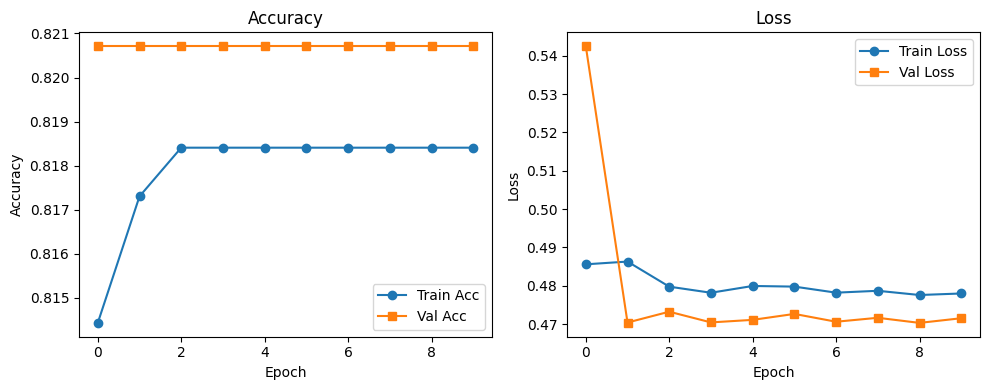

In [6]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

# Accuracy & Loss Plot
plt.figure(figsize=(10, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], marker='o', label='Train Acc')
plt.plot(history.history['val_accuracy'], marker='s', label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], marker='o', label='Train Loss')
plt.plot(history.history['val_loss'], marker='s', label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

#Model Deep Learning LSTM

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Deep Learning/ReviewTokoBaju.csv")
df = df[['Review Text', 'Recommended IND']].dropna()

# Tokenization and Padding
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['Review Text'])
X = tokenizer.texts_to_sequences(df['Review Text'])
X = pad_sequences(X, maxlen=300, padding='post')
vocab_size = len(tokenizer.word_index) + 1

y = df['Recommended IND'].values

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Model LSTM
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=300))
model_lstm.add(Bidirectional(LSTM(units=128)))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(128, activation='relu'))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.compile(optimizer=Adam(learning_rate=0.001),
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

history_lstm = model_lstm.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_test, y_test),
    verbose=1
)

Epoch 1/10
566/566 ━━━━━━━━━━━━━━━━━━━━ 69s 29ms/step - accuracy: 0.8291 - loss: 0.4147 - val_accuracy: 0.8786 - val_loss: 0.2661
Epoch 2/10
566/566 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - accuracy: 0.9050 - loss: 0.2346 - val_accuracy: 0.8878 - val_loss: 0.2892
Epoch 3/10
566/566 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.9297 - loss: 0.1819 - val_accuracy: 0.8925 - val_loss: 0.2822
Epoch 4/10
566/566 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.9421 - loss: 0.1469 - val_accuracy: 0.8759 - val_loss: 0.2912
Epoch 5/10
566/566 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - accuracy: 0.9520 - loss: 0.1331 - val_accuracy: 0.8870 - val_loss: 0.3293
Epoch 6/10
566/566 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.9634 - loss: 0.1015 - val_accuracy: 0.8768 - val_loss: 0.3120
Epoch 7/10
566/566 ━━━━━━━━━━━━━━━━━━━━ 34s 28ms/step - accuracy: 0.9690 - loss: 0.0848 - val_accuracy: 0.8850 - val_loss: 0.4484
Epoch 8/10
566/566 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.9785 - loss: 0.0606 - 

In [25]:
# Evaluate LSTM
y_probs_lstm = model_lstm.predict(x_test).ravel()
y_preds_lstm = (y_probs_lstm >= 0.5).astype(int)

acc_lstm = accuracy_score(y_test, y_preds_lstm)
precision_lstm = precision_score(y_test, y_preds_lstm)
recall_lstm = recall_score(y_test, y_preds_lstm)
f1_sq_lstm = f1_score(y_test, y_preds_lstm)**2
auc_lstm = roc_auc_score(y_test, y_probs_lstm)
train_acc_lstm = history_lstm.history['accuracy'][-1]

print(f"LSTM Results:")
print(f"Final Training Accuracy: {train_acc_lstm:.4f}")
print(f"Final Testing Accuracy: {acc_lstm:.4f}")
print(f"Precision: {precision_lstm:.4f}")
print(f"Recall: {recall_lstm:.4f}")
print(f"F1 Squared: {f1_sq_lstm:.4f}")
print(f"AUC: {auc_lstm:.4f}")

142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
LSTM Results:
Final Training Accuracy: 0.9795
Final Testing Accuracy: 0.8505
Precision: 0.9516
Recall: 0.8617
F1 Squared: 0.8180
AUC: 0.9072


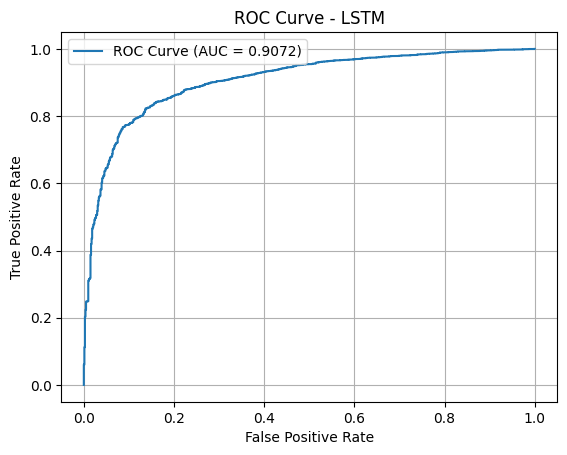

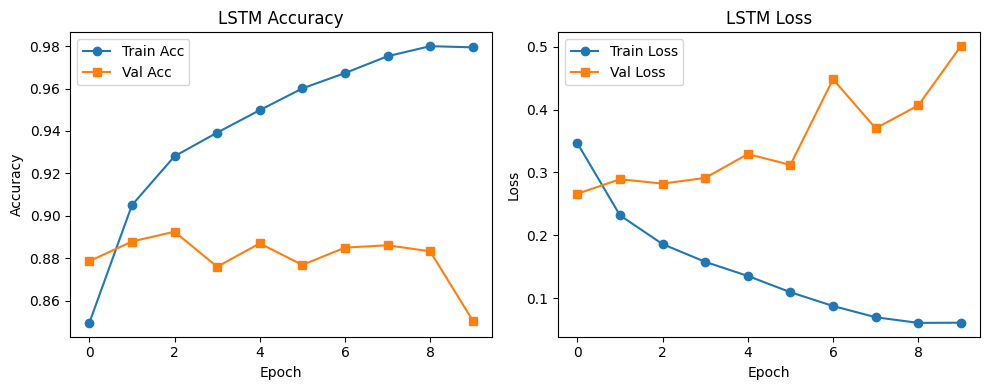

In [26]:
# ROC Curve
fpr_lstm, tpr_lstm, _ = roc_curve(y_test, y_probs_lstm)
plt.figure()
plt.plot(fpr_lstm, tpr_lstm, label='ROC Curve (AUC = {:.4f})'.format(auc_lstm))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LSTM')
plt.legend()
plt.grid()
plt.show()

# Grafik Accuracy dan Loss
plt.figure(figsize=(10, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['accuracy'], marker='o', label='Train Acc')
plt.plot(history_lstm.history['val_accuracy'], marker='s', label='Val Acc')
plt.title('LSTM Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['loss'], marker='o', label='Train Loss')
plt.plot(history_lstm.history['val_loss'], marker='s', label='Val Loss')
plt.title('LSTM Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

#Model Deep Learning GRU

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Deep Learning/ReviewTokoBaju.csv")
df = df[['Review Text', 'Recommended IND']].dropna()

# Tokenization and Padding
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['Review Text'])
X = tokenizer.texts_to_sequences(df['Review Text'])
X = pad_sequences(X, maxlen=300, padding='post')
vocab_size = len(tokenizer.word_index) + 1

y = df['Recommended IND'].values

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Model GRU
model_gru = Sequential()
model_gru.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=300))
model_gru.add(Bidirectional(GRU(units=128)))
model_gru.add(Dropout(0.5))
model_gru.add(Dense(128, activation='relu'))
model_gru.add(Dropout(0.3))
model_gru.add(Dense(1, activation='sigmoid'))

model_gru.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

history_gru = model_gru.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_test, y_test),
    verbose=1
)

Epoch 1/10
566/566 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.8309 - loss: 0.4259 - val_accuracy: 0.8775 - val_loss: 0.2697
Epoch 2/10
566/566 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - accuracy: 0.9036 - loss: 0.2397 - val_accuracy: 0.8914 - val_loss: 0.2458
Epoch 3/10
566/566 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.9278 - loss: 0.1772 - val_accuracy: 0.8936 - val_loss: 0.2671
Epoch 4/10
566/566 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.9464 - loss: 0.1393 - val_accuracy: 0.8934 - val_loss: 0.2760
Epoch 5/10
566/566 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - accuracy: 0.9650 - loss: 0.0977 - val_accuracy: 0.8863 - val_loss: 0.3188
Epoch 6/10
566/566 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.9746 - loss: 0.0706 - val_accuracy: 0.8836 - val_loss: 0.3696
Epoch 7/10
566/566 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.9819 - loss: 0.0559 - val_accuracy: 0.8825 - val_loss: 0.4269
Epoch 8/10
566/566 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.9873 - loss: 0.0413 - 

In [31]:
# Evaluate GRU
y_probs_gru = model_gru.predict(x_test).ravel()
y_preds_gru = (y_probs_gru >= 0.5).astype(int)

acc_gru = accuracy_score(y_test, y_preds_gru)
precision_gru = precision_score(y_test, y_preds_gru)
recall_gru = recall_score(y_test, y_preds_gru)
f1_sq_gru = f1_score(y_test, y_preds_gru)**2
auc_gru = roc_auc_score(y_test, y_probs_gru)
train_acc_gru = history_gru.history['accuracy'][-1]

print(f"GRU Results:")
print(f"Final Training Accuracy: {train_acc_gru:.4f}")
print(f"Final Testing Accuracy: {acc_gru:.4f}")
print(f"Precision: {precision_gru:.4f}")
print(f"Recall: {recall_gru:.4f}")
print(f"F1 Squared: {f1_sq_gru:.4f}")
print(f"AUC: {auc_gru:.4f}")

142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
GRU Results:
Final Training Accuracy: 0.9911
Final Testing Accuracy: 0.8794
Precision: 0.9132
Recall: 0.9427
F1 Squared: 0.8607
AUC: 0.9068


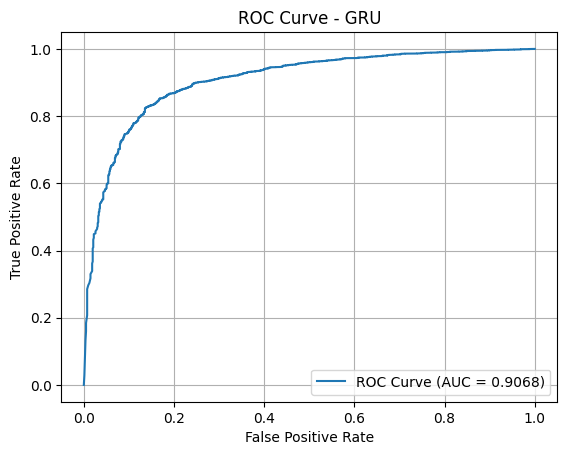

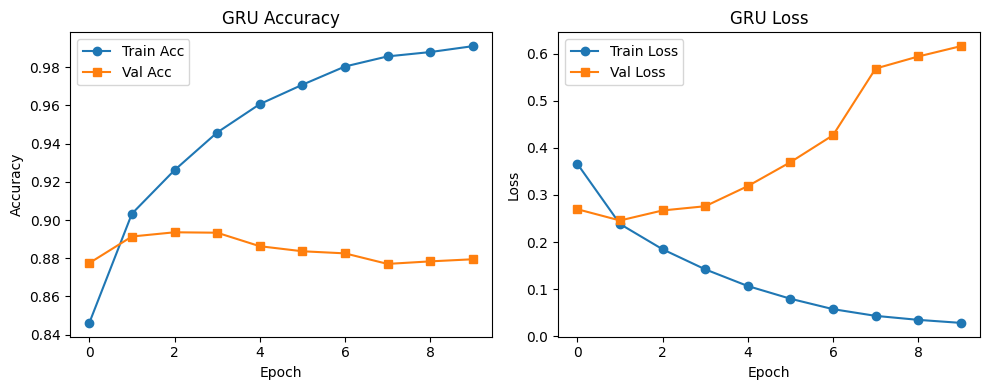

In [32]:
# ROC Curve
fpr_gru, tpr_gru, _ = roc_curve(y_test, y_probs_gru)
plt.figure()
plt.plot(fpr_gru, tpr_gru, label='ROC Curve (AUC = {:.4f})'.format(auc_gru))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - GRU')
plt.legend()
plt.grid()
plt.show()

# Grafik Accuracy dan Loss
plt.figure(figsize=(10, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_gru.history['accuracy'], marker='o', label='Train Acc')
plt.plot(history_gru.history['val_accuracy'], marker='s', label='Val Acc')
plt.title('GRU Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_gru.history['loss'], marker='o', label='Train Loss')
plt.plot(history_gru.history['val_loss'], marker='s', label='Val Loss')
plt.title('GRU Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## 📊 Persamaan Matematika Evaluasi Model Klasifikasi

- **TP** = True Positive  
- **TN** = True Negative  
- **FP** = False Positive  
- **FN** = False Negative  

---

### ✅ 1. Accuracy (Akurasi)  
Mengukur seberapa sering prediksi model benar:

\[$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$\]

---

### 🎯 2. Precision (Presisi)  
Mengukur berapa banyak dari yang diprediksi positif ternyata benar-benar positif:

\[$
\text{Precision} = \frac{TP}{TP + FP}
$\]

---

### 🔍 3. Recall (Sensitivitas / True Positive Rate)  
Mengukur seberapa banyak dari total positif yang berhasil ditemukan model:

\[$
\text{Recall} = \frac{TP}{TP + FN}
$\]

---

### ⚖️ 4. F1 Score  
Rata-rata harmonis dari Precision dan Recall:

\[$
\text{F1} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$\]

Jika ingin menghitung **F1-Squared**:

\[$
\text{F1}^2 = (\text{F1})^2
$\]

---

### 📈 5. AUC (Area Under Curve ROC)  
Luas di bawah kurva ROC, di mana:

- Sumbu X: False Positive Rate (FPR)
- Sumbu Y: True Positive Rate (TPR / Recall)

\[$
\text{FPR} = \frac{FP}{FP + TN}
$\]

\[$
\text{TPR} = \frac{TP}{TP + FN}
$\]

AUC dihitung dari integrasi numerik grafik ROC Curve.

---